In [1]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 40 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (8,653 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 160837 files and d

In [2]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic') 

In [3]:
import os
os.chdir("/content/drive/MyDrive//금융데이터 공모전")

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
pattern= pd.read_csv("pattern(중분류코드값을 매출건수로 편집).csv")
pattern=pattern.drop(columns=['Unnamed: 0','시군구'])
pattern

,기준년월,성별,연령,가구생애주기,법정동코드,매출금액,품목_1010,품목_1011,품목_1012,품목_1013,품목_1014,품목_1110,품목_1111,품목_1112,품목_1113,품목_1114,품목_1210,품목_1211,품목_1212,품목_1213,품목_1214,품목_1215,품목_1310,품목_1311,품목_1312,품목_1313,품목_1314,품목_1410,품목_1411,품목_1412,품목_1510,품목_1511,품목_1610,품목_1611,품목_1612,품목_1710,품목_1711,품목_1712,품목_1810,품목_1812,품목_1910,품목_1911,품목_1912,품목_1913,품목_2010,품목_2011,품목_2012,품목_2013,품목_2014,품목_2110,품목_2111,품목_2112,품목_9910,품목_9911,품목_9912,품목_9913
0,3,0,40.0,3,11530109.0,782521,13,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,3,0,20.0,2,11530109.0,963789,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,29,0,0,0,0,0,0
2,3,0,30.0,2,11530109.0,924309,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,46,0,0,0,0,0,0,0,0,0,0,0,0
3,3,0,30.0,2,11530109.0,1089360,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,54,0,0,0,0,0
4,3,0,30.0,2,11530109.0,1656740,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,58,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306117,3,0,30.0,1,11560108.0,1411368,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7,0,0,0,0,0,0,0,0
306118,3,1,30.0,1,11560108.0,1386040,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,63,0,0,0,0,0,0
306119,3,0,30.0,2,11560108.0,390818,0,0,0,0,0,0,0,0,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
306120,3,1,40.0,3,11560108.0,327592,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## **소비자개인정보** **예측하기**

## 1. 가구형태 예측하기

구매품목패턴과 결제가 발생한 지역을 분석해서 가구형태를 예측해 보기

In [ ]:
X1=pattern.iloc[:,0:3]
X2=pattern.iloc[:,4:56]
X=pd.concat([X1,X2],axis=1)
X=pd.get_dummies(data=X, columns=['법정동코드'], prefix=['법정동코드'])
y=pattern.iloc[:,[3]]

In [ ]:
X=X.drop(columns=['기준년월','성별','연령','매출금액'])
X

,품목_1010,품목_1011,품목_1012,품목_1013,품목_1014,품목_1110,품목_1111,품목_1112,품목_1113,품목_1114,품목_1210,품목_1211,품목_1212,품목_1213,품목_1214,품목_1215,품목_1310,품목_1311,품목_1312,품목_1313,품목_1314,품목_1410,품목_1411,품목_1412,품목_1510,품목_1511,품목_1610,품목_1611,품목_1612,품목_1710,품목_1711,품목_1712,품목_1810,품목_1812,품목_1910,품목_1911,품목_1912,품목_1913,품목_2010,품목_2011,...,법정동코드_11650108.0,법정동코드_11650109.0,법정동코드_11650110.0,법정동코드_11650111.0,법정동코드_11680101.0,법정동코드_11680103.0,법정동코드_11680104.0,법정동코드_11680105.0,법정동코드_11680106.0,법정동코드_11680107.0,법정동코드_11680108.0,법정동코드_11680110.0,법정동코드_11680111.0,법정동코드_11680112.0,법정동코드_11680113.0,법정동코드_11680114.0,법정동코드_11680115.0,법정동코드_11680118.0,법정동코드_11710101.0,법정동코드_11710102.0,법정동코드_11710103.0,법정동코드_11710104.0,법정동코드_11710105.0,법정동코드_11710106.0,법정동코드_11710107.0,법정동코드_11710108.0,법정동코드_11710109.0,법정동코드_11710111.0,법정동코드_11710112.0,법정동코드_11710113.0,법정동코드_11710114.0,법정동코드_11740101.0,법정동코드_11740102.0,법정동코드_11740103.0,법정동코드_11740105.0,법정동코드_11740106.0,법정동코드_11740107.0,법정동코드_11740108.0,법정동코드_11740109.0,법정동코드_11740110.0
0,13,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,46,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,58,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306117,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
306118,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
306119,0,0,0,0,0,0,0,0,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
306120,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
y

,가구생애주기
0,3
1,2
2,2
3,2
4,2
...,...
306117,1
306118,1
306119,2
306120,3


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.model_selection  import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [ ]:
random_forest= RandomForestClassifier(n_estimators= 50, criterion='gini', min_samples_split=2, n_jobs=-1)

baseline=random_forest

# fit classifier to training set
baseline.fit(X_train.to_numpy(), y_train.to_numpy().ravel())


# make predictions on test set
y_pred=baseline.predict(X_test)


In [ ]:
random_forest

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=-1,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [ ]:
from sklearn. metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.28      0.29      0.29     14814
           2       0.39      0.41      0.40     21289
           3       0.23      0.22      0.23     12151
           4       0.20      0.19      0.19      9478
           5       0.13      0.12      0.13      3493

    accuracy                           0.29     61225
   macro avg       0.25      0.25      0.25     61225
weighted avg       0.29      0.29      0.29     61225



In [ ]:
featureImportance = baseline.feature_importances_

In [ ]:
# featureImportance

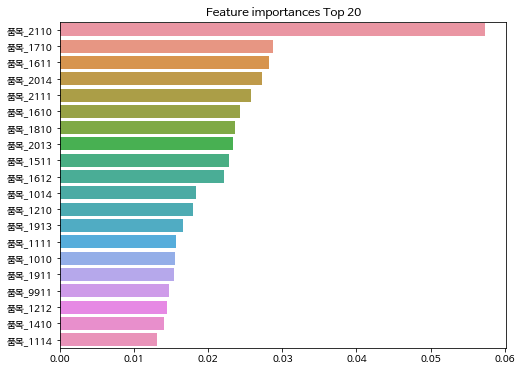

In [ ]:
##상위 20개 중요도
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic') 

importances_values = baseline.feature_importances_
importances = pd.Series(importances_values, index=X_train.columns)
top20 = importances.sort_values(ascending=False)[:20]
plt.figure(figsize=(8, 6))
plt.title('Feature importances Top 20')
sns.barplot(x = top20, y = top20.index)
plt.show()

In [ ]:
from xgboost import XGBClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

In [ ]:
xgb_clf = xgb.XGBClassifier()

In [ ]:
xgbc = XGBClassifier(max_depth=7, n_estimators=50, colsample_bytree=0.5, learning_rate=0.1,subsample=0.8,min_child_weight=1) ### colsample_bytee, subsample 1로 두면 오버 피팅되어서 여기서는 정확도는 올라가는데 실제 점수는 더 낮음
xgbc.fit(X_train,y_train.to_numpy().ravel())
prediction_xgb = xgbc.predict(X_test)

In [ ]:
from sklearn. metrics import classification_report
print(classification_report(y_test, prediction_xgb))

              precision    recall  f1-score   support

           1       0.52      0.05      0.10     14814
           2       0.35      0.98      0.51     21289
           3       0.44      0.01      0.02     12151
           4       0.50      0.00      0.00      9478
           5       0.00      0.00      0.00      3493

    accuracy                           0.35     61225
   macro avg       0.36      0.21      0.13     61225
weighted avg       0.41      0.35      0.21     61225



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Text(0.5, 1.0, 'Feature importance')

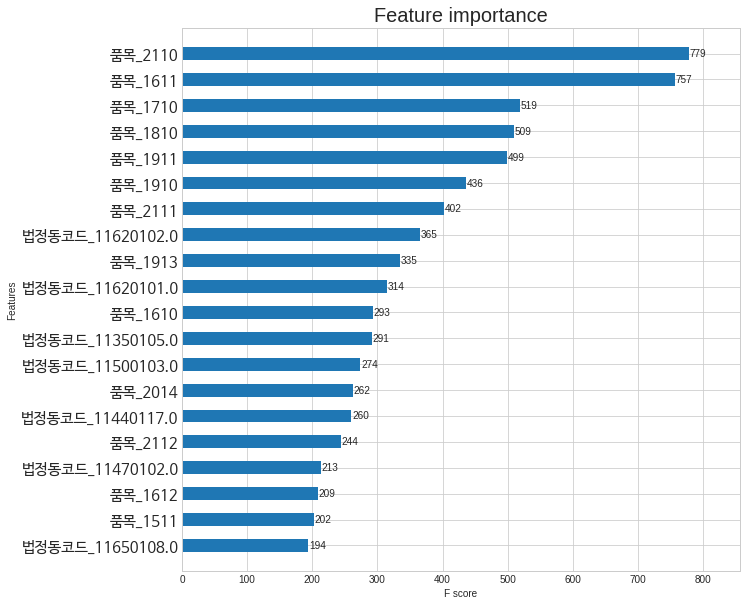

In [ ]:
##상위 20개 중요한 피처
import graphviz
import matplotlib.pyplot as plt
from xgboost import plot_importance
plt.style.use(['seaborn-whitegrid'])
fig,ax = plt.subplots(figsize=(10,10))
plot_importance(xgbc, ax=ax, max_num_features=20, height=0.5)
plt.yticks(fontproperties='NanumBarunGothic', fontsize=15) 
plt.title('Feature importance',fontsize=20)

가구형태를 예측하는데 있어서 특정 지역이라 품목만 선별해서 한번 더 돌려보기!!

## 2. 성별 예측하기

In [ ]:
pattern= pd.read_csv("pattern(중분류코드값을 매출건수로 편집).csv")
pattern=pattern.drop(columns=['Unnamed: 0','시군구'])

In [ ]:
X1=pattern.iloc[:,0:3]
X2=pattern.iloc[:,4:56]
X=pd.concat([X1,X2],axis=1)
X=pd.get_dummies(data=X, columns=['법정동코드'], prefix=['법정동코드'])
pattern=X.drop(columns=['기준년월','연령','매출금액'])
X=pattern.iloc[:,1:]
y=pattern.iloc[:,[0]]

In [ ]:
X

,품목_1010,품목_1011,품목_1012,품목_1013,품목_1014,품목_1110,품목_1111,품목_1112,품목_1113,품목_1114,품목_1210,품목_1211,품목_1212,품목_1213,품목_1214,품목_1215,품목_1310,품목_1311,품목_1312,품목_1313,품목_1314,품목_1410,품목_1411,품목_1412,품목_1510,품목_1511,품목_1610,품목_1611,품목_1612,품목_1710,품목_1711,품목_1712,품목_1810,품목_1812,품목_1910,품목_1911,품목_1912,품목_1913,품목_2010,품목_2011,...,법정동코드_11650108.0,법정동코드_11650109.0,법정동코드_11650110.0,법정동코드_11650111.0,법정동코드_11680101.0,법정동코드_11680103.0,법정동코드_11680104.0,법정동코드_11680105.0,법정동코드_11680106.0,법정동코드_11680107.0,법정동코드_11680108.0,법정동코드_11680110.0,법정동코드_11680111.0,법정동코드_11680112.0,법정동코드_11680113.0,법정동코드_11680114.0,법정동코드_11680115.0,법정동코드_11680118.0,법정동코드_11710101.0,법정동코드_11710102.0,법정동코드_11710103.0,법정동코드_11710104.0,법정동코드_11710105.0,법정동코드_11710106.0,법정동코드_11710107.0,법정동코드_11710108.0,법정동코드_11710109.0,법정동코드_11710111.0,법정동코드_11710112.0,법정동코드_11710113.0,법정동코드_11710114.0,법정동코드_11740101.0,법정동코드_11740102.0,법정동코드_11740103.0,법정동코드_11740105.0,법정동코드_11740106.0,법정동코드_11740107.0,법정동코드_11740108.0,법정동코드_11740109.0,법정동코드_11740110.0
0,13,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,46,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,58,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306117,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
306118,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
306119,0,0,0,0,0,0,0,0,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
306120,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
y

,성별
0,0
1,0
2,0
3,0
4,0
...,...
306117,0
306118,1
306119,0
306120,1


/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


0.4.3
Class=0, n=195384 (63.826%)
Class=1, n=110738 (36.174%)


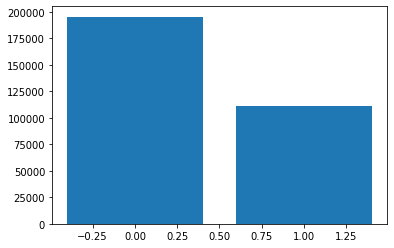

In [ ]:
import imblearn
print(imblearn.__version__)

import pandas as pd
from collections import Counter
from matplotlib import pyplot


# 필요 함수 정의
def count_and_plot(y): 
    counter = Counter(y)
    for k,v in counter.items():
        print('Class=%d, n=%d (%.3f%%)' % (k, v, v / len(y) * 100))
    pyplot.bar(counter.keys(), counter.values())
    pyplot.show()

from imblearn.under_sampling import RandomUnderSampler
count_and_plot(y.to_numpy().ravel())

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
random_forest= RandomForestClassifier(n_estimators= 50, criterion='gini', min_samples_split=2, n_jobs=-1)

baseline=random_forest

# fit classifier to training set
baseline.fit(X_train.to_numpy(), y_train.to_numpy().ravel())


# make predictions on test set
y_pred=baseline.predict(X_test)


In [ ]:
random_forest

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=-1,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [ ]:
from sklearn. metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.71      0.70     39133
           1       0.46      0.44      0.45     22092

    accuracy                           0.61     61225
   macro avg       0.58      0.58      0.58     61225
weighted avg       0.61      0.61      0.61     61225



/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54408 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47785 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 54408 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 47785 missing from current font.
  font.set_text(s, 0, flags=flags)


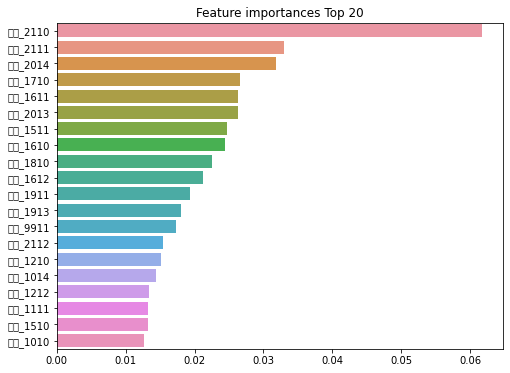

In [ ]:
importances_values = baseline.feature_importances_
importances = pd.Series(importances_values, index=X_train.columns)
top20 = importances.sort_values(ascending=False)[:20]
plt.figure(figsize=(8, 6))
plt.title('Feature importances Top 20')
sns.barplot(x = top20, y = top20.index)
plt.show()

In [ ]:
from xgboost import XGBClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

In [ ]:
xgbc = xgb.XGBClassifier(max_depth=10, n_estimators=100, colsample_bytree=1, learning_rate=0.01,subsample=1,min_child_weight=0.8) ### colsample_bytee, subsample 1로 두면 오버 피팅되어서 여기서는 정확도는 올라가는데 실제 점수는 더 낮음
xgbc.fit(X_train, y_train.to_numpy().ravel())
prediction_xgb = xgbc.predict(X_test)
print(accuracy_score(y_test, prediction_xgb))

0.6397550020416497


In [ ]:
from sklearn. metrics import classification_report
print(classification_report(y_test, prediction_xgb))

              precision    recall  f1-score   support

           0       0.64      1.00      0.78     39133
           1       0.59      0.01      0.01     22092

    accuracy                           0.64     61225
   macro avg       0.62      0.50      0.39     61225
weighted avg       0.62      0.64      0.50     61225



In [ ]:
#xgb 상위 20개 중요도
importances_values = baseline.feature_importances_
importances = pd.Series(importances_values, index=X_train.columns)
top20 = importances.sort_values(ascending=False)[:20]
plt.figure(figsize=(8, 6))
plt.title('Feature importances Top 20')
sns.barplot(x = top20, y = top20.index)
plt.show()

AttributeError: ignored

### weight unbalance 문제를 undersampling을 이용해 조절



0.4.3


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)


Class=0, n=110738 (50.000%)
Class=1, n=110738 (50.000%)


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


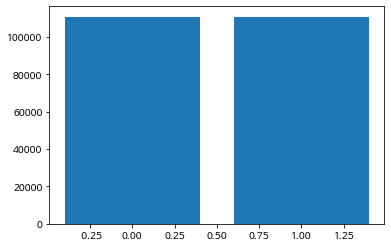

In [ ]:
import imblearn
print(imblearn.__version__)

import pandas as pd
from collections import Counter
from matplotlib import pyplot


# 필요 함수 정의
def count_and_plot(y): 
    counter = Counter(y)
    for k,v in counter.items():
        print('Class=%d, n=%d (%.3f%%)' % (k, v, v / len(y) * 100))
    pyplot.bar(counter.keys(), counter.values())
    pyplot.show()

from imblearn.under_sampling import RandomUnderSampler
X_resample, y_resample= RandomUnderSampler(random_state=0).fit_resample(X, y)
count_and_plot(y_resample.ravel())

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_resample, y_resample, test_size=0.2, random_state=42)

random_forest= RandomForestClassifier(n_estimators= 50, criterion='gini', min_samples_split=2, n_jobs=-1)

baseline=random_forest

# fit classifier to training set
baseline.fit(X_train, y_train.ravel())


# make predictions on test set
y_pred=baseline.predict(X_test)



In [ ]:
from sklearn. metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.65      0.45      0.53     22060
           1       0.58      0.76      0.66     22236

    accuracy                           0.60     44296
   macro avg       0.61      0.60      0.59     44296
weighted avg       0.61      0.60      0.59     44296



In [ ]:
featureImportance = baseline.feature_importances_

In [ ]:
featureImportance

array([0.04964858, 0.04198002, 0.008117  , 0.00183487, 0.01955733,
       0.0174093 , 0.0170658 , 0.02160307, 0.0187734 , 0.02002719,
       0.03275667, 0.040164  , 0.02385626, 0.00158858, 0.00816575,
       0.02118238, 0.00444229, 0.01201428, 0.00427049, 0.00811327,
       0.00708007, 0.02263127, 0.01169011, 0.00540293, 0.01191131,
       0.02290865, 0.0276781 , 0.03298942, 0.02317589, 0.0334053 ,
       0.00933775, 0.02312333, 0.02620418, 0.00815491, 0.01202699,
       0.02254918, 0.02785641, 0.02018176, 0.00868473, 0.00508527,
       0.01949267, 0.02458768, 0.03011698, 0.10520267, 0.03494209,
       0.01717317, 0.00344476, 0.02621198, 0.00302363, 0.00115624])

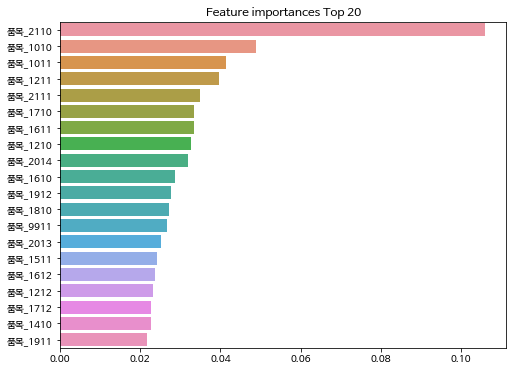

In [ ]:
##상위 20개 중요도
importances_values = baseline.feature_importances_
importances = pd.Series(importances_values, index=X.columns)
top20 = importances.sort_values(ascending=False)[:20]
plt.figure(figsize=(8, 6))
plt.title('Feature importances Top 20')
sns.barplot(x = top20, y = top20.index)
plt.show()

In [ ]:
from xgboost import XGBClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_resample, y_resample, test_size=0.2, random_state=42)
xgbc = xgb.XGBClassifier(max_depth=10, n_estimators=100, colsample_bytree=1, learning_rate=0.01,subsample=1,min_child_weight=0.8) ### colsample_bytee, subsample 1로 두면 오버 피팅되어서 여기서는 정확도는 올라가는데 실제 점수는 더 낮음
xgbc.fit(X_train, y_train.ravel())
prediction_xgb = xgbc.predict(X_test)
print(accuracy_score(y_test, prediction_xgb))

0.5864186382517609


In [ ]:
from sklearn. metrics import classification_report
print(classification_report(y_test, prediction_xgb))

              precision    recall  f1-score   support

           0       0.76      0.25      0.37     22060
           1       0.55      0.92      0.69     22236

    accuracy                           0.59     44296
   macro avg       0.66      0.59      0.53     44296
weighted avg       0.66      0.59      0.53     44296



### oversampling 방법 성능은 좋지만 오류가 생길 가능성이 있기 때문에 왠만하면 undersampling으로 사용

0.4.3


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Class=0, n=195384 (50.000%)
Class=1, n=195384 (50.000%)


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


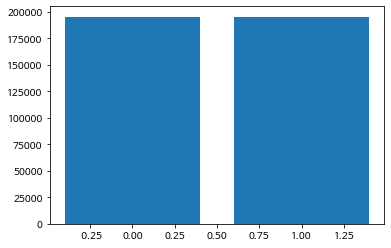

In [ ]:
import imblearn
print(imblearn.__version__)

import pandas as pd
from collections import Counter
from matplotlib import pyplot


# 필요 함수 정의
def count_and_plot(y): 
    counter = Counter(y)
    for k,v in counter.items():
        print('Class=%d, n=%d (%.3f%%)' % (k, v, v / len(y) * 100))
    pyplot.bar(counter.keys(), counter.values())
    pyplot.show()

from imblearn.over_sampling import RandomOverSampler
X_resample, y_resample= RandomOverSampler(random_state=0).fit_resample(X, y)
count_and_plot(y_resample.ravel())

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_resample, y_resample, test_size=0.2, random_state=42)

random_forest= RandomForestClassifier(n_estimators= 50, criterion='gini', min_samples_split=2, n_jobs=-1)

baseline=random_forest

# fit classifier to training set
baseline.fit(X_train, y_train.ravel())


# make predictions on test set
y_pred=baseline.predict(X_test)



In [ ]:
from sklearn. metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.45      0.54     39208
           1       0.58      0.78      0.67     38946

    accuracy                           0.61     78154
   macro avg       0.63      0.61      0.60     78154
weighted avg       0.63      0.61      0.60     78154



In [ ]:
featureImportance = baseline.feature_importances_

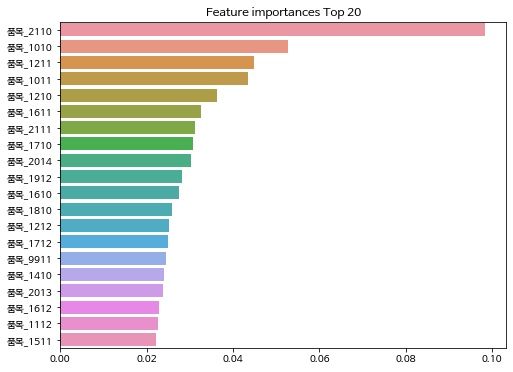

In [ ]:
##상위 20개 중요도
importances_values = baseline.feature_importances_
importances = pd.Series(importances_values, index=X.columns)
top20 = importances.sort_values(ascending=False)[:20]
plt.figure(figsize=(8, 6))
plt.title('Feature importances Top 20')
sns.barplot(x = top20, y = top20.index)
plt.show()

## **구매패턴을** **가지고** **구매할** **품목** **예측하기**

# 1. 여성의류 예측

In [ ]:
pattern

,기준년월,성별,연령,가구생애주기,매출금액,품목_1010,품목_1011,품목_1012,품목_1013,품목_1014,품목_1110,품목_1111,품목_1112,품목_1113,품목_1114,품목_1210,품목_1211,품목_1212,품목_1213,품목_1214,품목_1215,품목_1310,품목_1311,품목_1312,품목_1313,품목_1314,품목_1410,품목_1411,품목_1412,품목_1510,품목_1511,품목_1610,품목_1611,품목_1612,품목_1710,품목_1711,품목_1712,품목_1810,품목_1812,품목_1910,...,법정동코드_11650108.0,법정동코드_11650109.0,법정동코드_11650110.0,법정동코드_11650111.0,법정동코드_11680101.0,법정동코드_11680103.0,법정동코드_11680104.0,법정동코드_11680105.0,법정동코드_11680106.0,법정동코드_11680107.0,법정동코드_11680108.0,법정동코드_11680110.0,법정동코드_11680111.0,법정동코드_11680112.0,법정동코드_11680113.0,법정동코드_11680114.0,법정동코드_11680115.0,법정동코드_11680118.0,법정동코드_11710101.0,법정동코드_11710102.0,법정동코드_11710103.0,법정동코드_11710104.0,법정동코드_11710105.0,법정동코드_11710106.0,법정동코드_11710107.0,법정동코드_11710108.0,법정동코드_11710109.0,법정동코드_11710111.0,법정동코드_11710112.0,법정동코드_11710113.0,법정동코드_11710114.0,법정동코드_11740101.0,법정동코드_11740102.0,법정동코드_11740103.0,법정동코드_11740105.0,법정동코드_11740106.0,법정동코드_11740107.0,법정동코드_11740108.0,법정동코드_11740109.0,법정동코드_11740110.0
0,3,0,40.0,3,782521,13,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,3,0,20.0,2,963789,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3,0,30.0,2,924309,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,3,0,30.0,2,1089360,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,3,0,30.0,2,1656740,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,58,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306117,3,0,30.0,1,1411368,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
306118,3,1,30.0,1,1386040,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
306119,3,0,30.0,2,390818,0,0,0,0,0,0,0,0,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
306120,3,1,40.0,3,327592,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
pattern2=pd.get_dummies(data=pattern, columns=['법정동코드'], prefix=['법정동코드'])
X=pattern2.iloc[:,6:]
y=pattern2.iloc[:,[5]]

In [ ]:
X

,품목_1011,품목_1012,품목_1013,품목_1014,품목_1110,품목_1111,품목_1112,품목_1113,품목_1114,품목_1210,품목_1211,품목_1212,품목_1213,품목_1214,품목_1215,품목_1310,품목_1311,품목_1312,품목_1313,품목_1314,품목_1410,품목_1411,품목_1412,품목_1510,품목_1511,품목_1610,품목_1611,품목_1612,품목_1710,품목_1711,품목_1712,품목_1810,품목_1812,품목_1910,품목_1911,품목_1912,품목_1913,품목_2010,품목_2011,품목_2012,...,법정동코드_11650108.0,법정동코드_11650109.0,법정동코드_11650110.0,법정동코드_11650111.0,법정동코드_11680101.0,법정동코드_11680103.0,법정동코드_11680104.0,법정동코드_11680105.0,법정동코드_11680106.0,법정동코드_11680107.0,법정동코드_11680108.0,법정동코드_11680110.0,법정동코드_11680111.0,법정동코드_11680112.0,법정동코드_11680113.0,법정동코드_11680114.0,법정동코드_11680115.0,법정동코드_11680118.0,법정동코드_11710101.0,법정동코드_11710102.0,법정동코드_11710103.0,법정동코드_11710104.0,법정동코드_11710105.0,법정동코드_11710106.0,법정동코드_11710107.0,법정동코드_11710108.0,법정동코드_11710109.0,법정동코드_11710111.0,법정동코드_11710112.0,법정동코드_11710113.0,법정동코드_11710114.0,법정동코드_11740101.0,법정동코드_11740102.0,법정동코드_11740103.0,법정동코드_11740105.0,법정동코드_11740106.0,법정동코드_11740107.0,법정동코드_11740108.0,법정동코드_11740109.0,법정동코드_11740110.0
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,46,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,58,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306117,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
306118,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
306119,0,0,0,0,0,0,0,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
306120,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
y['품목_1010']=y['품목_1010'].apply(lambda x: 1 if x!=0 else 0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
y

,품목_1010
0,1
1,0
2,0
3,0
4,0
...,...
306117,0
306118,0
306119,0
306120,0


0.4.3
Class=1, n=7137 (2.331%)
Class=0, n=298985 (97.669%)


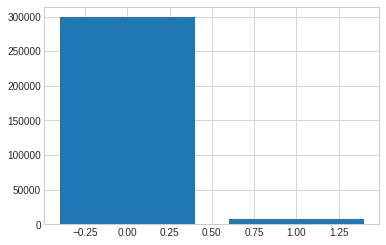

In [ ]:
import imblearn
print(imblearn.__version__)

import pandas as pd
from collections import Counter
from matplotlib import pyplot


# 필요 함수 정의
def count_and_plot(y): 
    counter = Counter(y)
    for k,v in counter.items():
        print('Class=%d, n=%d (%.3f%%)' % (k, v, v / len(y) * 100))
    pyplot.bar(counter.keys(), counter.values())
    pyplot.show()

from imblearn.under_sampling import RandomUnderSampler
count_and_plot(y.to_numpy().ravel())

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [ ]:
random_forest= RandomForestClassifier(n_estimators= 50, criterion='gini', min_samples_split=2, n_jobs=-1)

baseline=random_forest

# fit classifier to training set
baseline.fit(X_train.to_numpy(), y_train.to_numpy().ravel())


# make predictions on test set
y_pred=baseline.predict(X_test)


In [ ]:
random_forest

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=-1,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [ ]:
from sklearn. metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     59843
           1       1.00      1.00      1.00      1382

    accuracy                           1.00     61225
   macro avg       1.00      1.00      1.00     61225
weighted avg       1.00      1.00      1.00     61225



### weight unbalance 문제를 undersampling 방법

0.4.3


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Class=0, n=7137 (50.000%)
Class=1, n=7137 (50.000%)


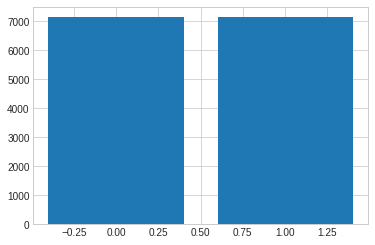

In [ ]:
import imblearn
print(imblearn.__version__)

import pandas as pd
from collections import Counter

def count_and_plot(y): 
    counter = Counter(y)
    for k,v in counter.items():
        print('Class=%d, n=%d (%.3f%%)' % (k, v, v / len(y) * 100))
    pyplot.bar(counter.keys(), counter.values())
    pyplot.show()

from imblearn.under_sampling import RandomUnderSampler
X_resample, y_resample= RandomUnderSampler(random_state=0).fit_resample(X, y)
count_and_plot(y_resample.ravel())

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_resample, y_resample, test_size=0.2, random_state=42)

random_forest= RandomForestClassifier(n_estimators= 50, criterion='gini', min_samples_split=2, n_jobs=-1)

baseline=random_forest

# fit classifier to training set
baseline.fit(X_train, y_train.ravel())


# make predictions on test set
y_pred=baseline.predict(X_test)



In [ ]:
from sklearn. metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1447
           1       1.00      1.00      1.00      1408

    accuracy                           1.00      2855
   macro avg       1.00      1.00      1.00      2855
weighted avg       1.00      1.00      1.00      2855



In [ ]:
featureImportance = baseline.feature_importances_

In [ ]:
# featureImportance

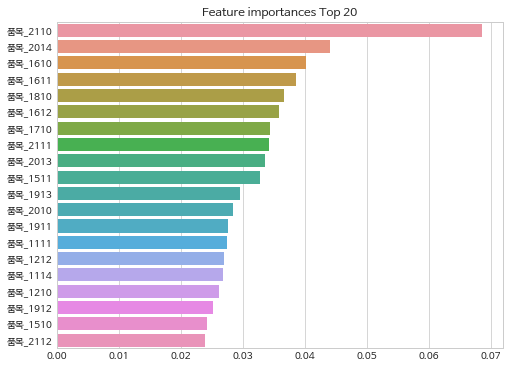

In [ ]:
##상위 20개 중요도
importances_values = baseline.feature_importances_
importances = pd.Series(importances_values, index=X.columns)
top20 = importances.sort_values(ascending=False)[:20]
plt.figure(figsize=(8, 6))
plt.title('Feature importances Top 20')
sns.barplot(x = top20, y = top20.index)
plt.show()

### oversampling 방법으로 <시간은 8분정도로 오래걸리지만 성능은 undersample하는 것 보다 훨씬 좋음>

0.4.3


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Class=1, n=298985 (50.000%)
Class=0, n=298985 (50.000%)


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


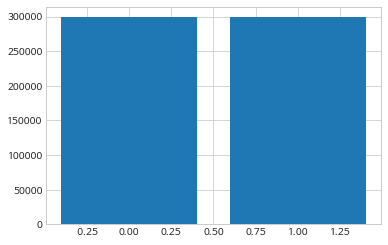

In [ ]:
import imblearn
print(imblearn.__version__)

import pandas as pd
from collections import Counter
from matplotlib import pyplot


# 필요 함수 정의
def count_and_plot(y): 
    counter = Counter(y)
    for k,v in counter.items():
        print('Class=%d, n=%d (%.3f%%)' % (k, v, v / len(y) * 100))
    pyplot.bar(counter.keys(), counter.values())
    pyplot.show()

from imblearn.over_sampling import RandomOverSampler
X_resample, y_resample= RandomOverSampler(random_state=0).fit_resample(X, y)
count_and_plot(y_resample.ravel())

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_resample, y_resample, test_size=0.2, random_state=42)

random_forest= RandomForestClassifier(n_estimators= 50, criterion='gini', min_samples_split=2, n_jobs=-1)

baseline=random_forest

# fit classifier to training set
baseline.fit(X_train, y_train.ravel())


# make predictions on test set
y_pred=baseline.predict(X_test)



In [ ]:
from sklearn. metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     59858
           1       1.00      1.00      1.00     59736

    accuracy                           1.00    119594
   macro avg       1.00      1.00      1.00    119594
weighted avg       1.00      1.00      1.00    119594



In [ ]:
featureImportance = baseline.feature_importances_

In [ ]:
featureImportance

array([1.42811740e-02, 2.38805810e-02, 5.17517739e-03, 2.62178006e-02,
       1.43618950e-02, 2.37720309e-02, 1.38696012e-02, 1.42666963e-02,
       2.20961099e-02, 2.72337655e-02, 1.52331903e-02, 2.55995273e-02,
       1.47305583e-03, 5.00285496e-03, 7.08118559e-03, 2.84590015e-03,
       9.80288987e-03, 4.31973730e-03, 8.30837786e-03, 7.46653010e-03,
       2.13936438e-02, 1.35733656e-02, 7.52416955e-03, 2.50526518e-02,
       3.96568372e-02, 3.79269608e-02, 4.04176188e-02, 3.33927607e-02,
       4.12462540e-02, 1.47499336e-02, 1.79040423e-02, 4.04904927e-02,
       5.53912641e-03, 1.29740811e-02, 2.87459388e-02, 2.19102542e-02,
       2.86700068e-02, 2.12401042e-02, 1.28253996e-02, 2.09216147e-02,
       3.41060208e-02, 4.05531469e-02, 6.75560788e-02, 4.35112696e-02,
       2.53871088e-02, 1.15548278e-03, 2.15979975e-02, 4.49362292e-03,
       1.48733031e-03, 9.68261216e-07, 2.04451105e-05, 1.92084234e-06,
       0.00000000e+00, 2.21648021e-06, 0.00000000e+00, 1.24963810e-06,
      

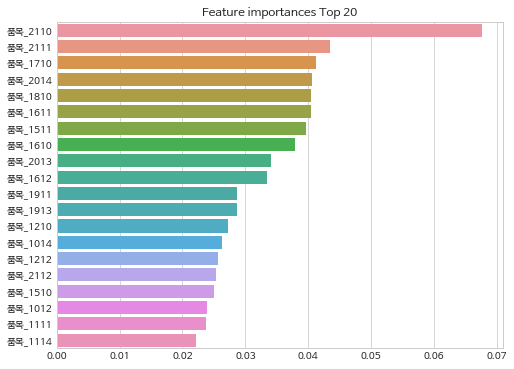

In [ ]:
##상위 20개 중요도
importances_values = baseline.feature_importances_
importances = pd.Series(importances_values, index=X.columns)
top20 = importances.sort_values(ascending=False)[:20]
plt.figure(figsize=(8, 6))
plt.title('Feature importances Top 20')
sns.barplot(x = top20, y = top20.index)
plt.show()